In [9]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import joblib

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# Load the dataset from a CSV file (use the provided link)
url = "https://drive.google.com/uc?id=1eslDKi95Pg7BYZKcrXCXPP3KQj_pdnUd"
dataset = pd.read_csv(url)

In [12]:
# Display basic information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB
None


In [13]:
print(dataset.head())

                                              tweets  target
0  Our Deeds are the Reason of this #earthquake M...       1
1             Forest fire near La Ronge Sask. Canada       1
2  All residents asked to 'shelter in place' are ...       1
3  13,000 people receive #wildfires evacuation or...       1
4  Just got sent this photo from Ruby #Alaska as ...       1


In [14]:
# Check for missing values
missing_values = dataset.isnull().sum()
print(missing_values)

tweets    0
target    0
dtype: int64


In [15]:
# Drop rows with missing values (if any)
dataset.dropna(inplace=True)

In [16]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [17]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize, lowercase, remove punctuation, stopwords, and apply lemmatization
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

In [18]:
# Apply the preprocessing function to the 'tweets' column
dataset['cleaned_tweets'] = dataset['tweets'].apply(preprocess_text)

In [19]:
# Choose one of the vectorizers: CountVectorizer or TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_tweets'])
y = dataset['target']

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print("Naive Bayes Classification Report")
print(classification_report(y_test, nb_predictions))

Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1318
           1       0.82      0.67      0.74       966

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.79      2284
weighted avg       0.80      0.80      0.80      2284



In [22]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Classification Report")
print(classification_report(y_test, lr_predictions))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1318
           1       0.85      0.65      0.74       966

    accuracy                           0.80      2284
   macro avg       0.82      0.78      0.79      2284
weighted avg       0.81      0.80      0.80      2284



In [23]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbors Classification Report")
print(classification_report(y_test, knn_predictions))

K-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1318
           1       0.76      0.67      0.71       966

    accuracy                           0.77      2284
   macro avg       0.77      0.76      0.76      2284
weighted avg       0.77      0.77      0.77      2284



In [24]:

# Function to plot a normalized confusion matrix
def plot_normalized_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Normalized Confusion Matrix')
    plt.show()

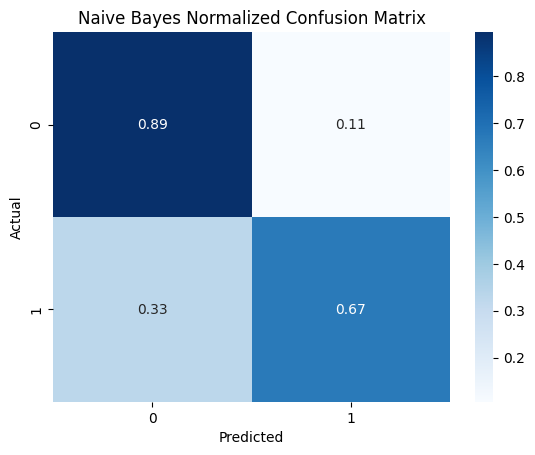

In [25]:
# Plot normalized confusion matrices
plot_normalized_confusion_matrix(y_test, nb_predictions, "Naive Bayes")

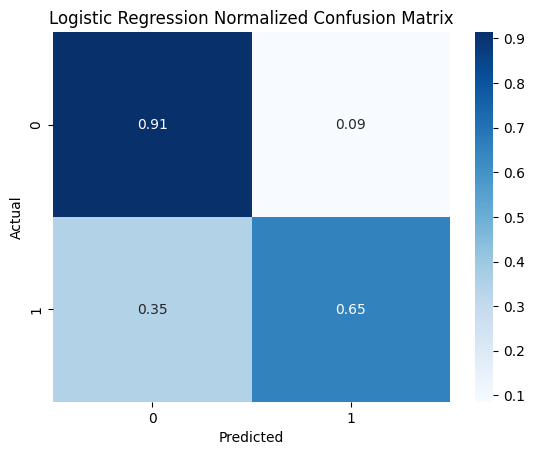

In [26]:
plot_normalized_confusion_matrix(y_test, lr_predictions, "Logistic Regression")

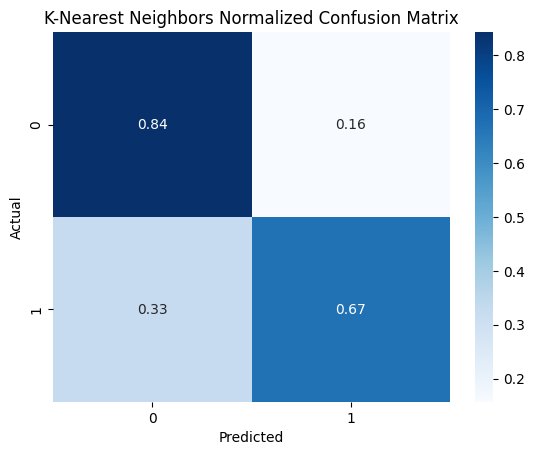

In [27]:
plot_normalized_confusion_matrix(y_test, knn_predictions, "K-Nearest Neighbors")

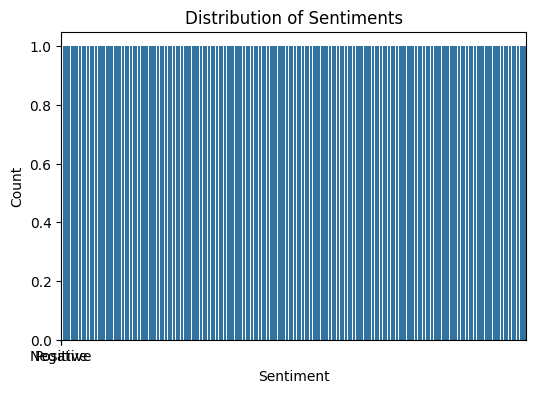

In [28]:
# Plot the distribution of target labels
plt.figure(figsize=(6,4))
sns.countplot(dataset['target'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

In [29]:
# Word cloud for positive tweets
positive_tweets = ' '.join(dataset[dataset['target'] == 1]['cleaned_tweets'])
wordcloud_positive = WordCloud(width=800, height=400, max_font_size=100, max_words=100, background_color='white').generate(positive_tweets)


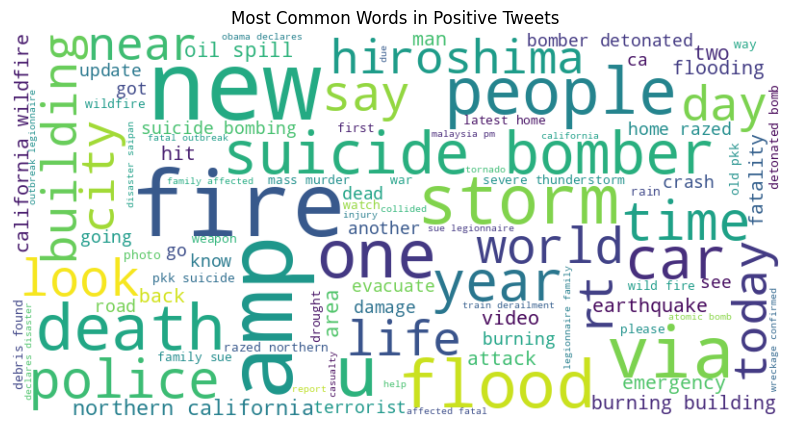

In [30]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Tweets')
plt.show()

In [31]:
# Word cloud for negative tweets
negative_tweets = ' '.join(dataset[dataset['target'] == 0]['cleaned_tweets'])
wordcloud_negative = WordCloud(width=800, height=400, max_font_size=100, max_words=100, background_color='black').generate(negative_tweets)

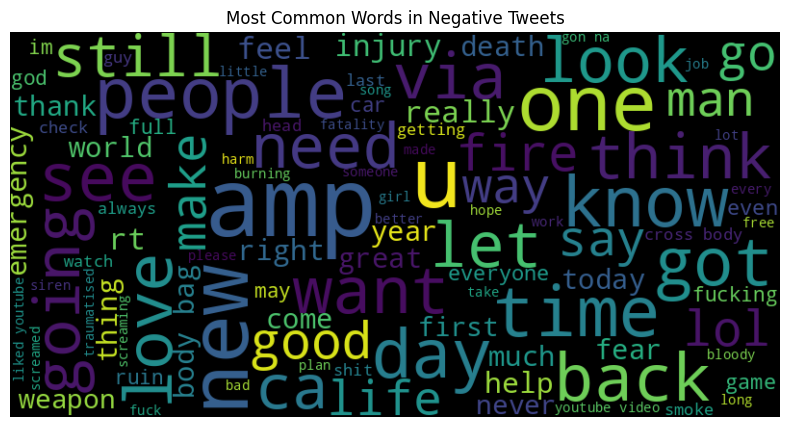

In [32]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Tweets')
plt.show()

In [33]:
# Model accuracy scores
model_accuracies = {
    'Multinomial Naive Bayes': nb_model.score(X_test, y_test),
    'Logistic Regression': lr_model.score(X_test, y_test),
    'K-Nearest Neighbors': knn_model.score(X_test, y_test)
}

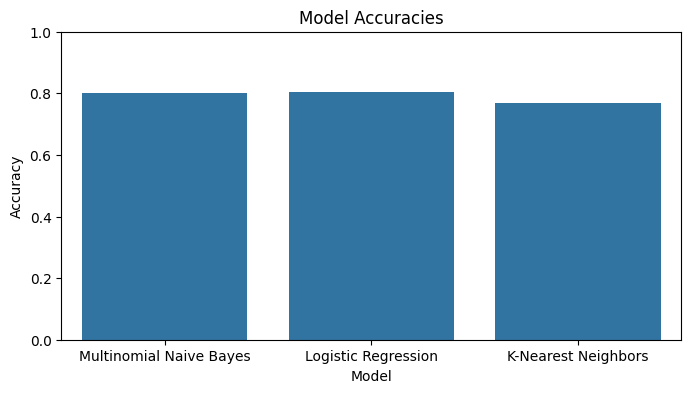

In [34]:
# Plot model accuracies
plt.figure(figsize=(8,4))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [35]:
# Based on the classification reports and confusion matrices, choose the best-performing model.
best_model = lr_model

In [36]:
# Save the model using joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [ ]:
pip install gensim

In [ ]:
from gensim.models import KeyedVectors
GLOVE_DIMENSION = 100

def preprocess_text(text):
    return text.lower()

dataset = pd.read_csv('disaster_tweets_data(DS).csv')
dataset['cleaned_tweets'] = dataset['tweets'].apply(preprocess_text)

# Load GloVe vectors, handling potential dimension mismatches
glove_vectors = KeyedVectors.load_word2vec_format('glove.6B.100d.txt', binary=False, no_header=True, encoding='utf-8', limit=None)

def tweet_to_glove_vector(tweet, glove_vectors):
    words = tweet.split()
    vector = np.zeros(GLOVE_DIMENSION)
    valid_words = 0
    for word in words:
        # Check if the word exists in GloVe
        if word in glove_vectors:
            word_vector = glove_vectors[word]
            # Handle potential dimension mismatches
            if len(word_vector) == GLOVE_DIMENSION:
                vector += word_vector
                valid_words += 1
            else:
                print(f"Warning: Word '{word}' has unexpected dimensionality {len(word_vector)}. Skipping.")
    if valid_words > 0:
        vector /= valid_words
    return vector

# Handle words with unexpected dimensionality
glove_embeddings = np.array([
    tweet_to_glove_vector(tweet, glove_vectors) for tweet in dataset['cleaned_tweets']
])

In [ ]:
!pip install transformers
from transformers import BertTokenizer, BertForSequenceClassification

# BERT Model for Classification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize and encode sequences in the dataset
def tokenize_function(examples):
    return tokenizer(examples['tweets'].tolist(), padding='max_length', truncation=True)  # Convert to list

# Apply to the entire DataFrame at once
tokenized_data = tokenize_function(dataset)

In [ ]:
!pip install streamlit
import streamlit as st

# Streamlit Dashboard for Visualization
st.title("Disaster Tweet Sentiment Analysis")
st.subheader("Explore the data and model predictions")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


2024-08-05 16:24:27.427 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [ ]:
# Upload CSV file for analysis
uploaded_file = st.file_uploader("disaster_tweets_data(DS).csv")
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.write(df.head())

In [38]:
# Interactive prediction on new tweets
user_input = st.text_area("Enter a tweet for sentiment analysis:")
if st.button("Analyze"):
    cleaned_input = preprocess_text(user_input)
    vector_input = vectorizer.transform([cleaned_input])
    prediction = nb_model.predict(vector_input)
    st.write(f"Predicted Sentiment: {'Positive' if prediction == 1 else 'Negative'}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


2024-08-06 16:42:51.831 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-08-06 16:42:51.968 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [39]:
print(X_train.shape)  # Should be (n_samples_train, n_features)
print(X_test.shape)   # Should be (n_samples_test, n_features)


(5329, 13705)
(2284, 13705)


In [7]:
df = pd.read_csv('disaster_tweets_data(DS).csv')

# Now you can save the DataFrame to a CSV file
df.to_csv('cleaned_disaster_tweets.csv', index=False)

In [6]:
# Display a final message
print("All steps completed successfully!")

All steps completed successfully!
